In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('questions.csv')

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
data.shape

(404351, 6)

In [5]:
data = data.dropna()

In [6]:
data.shape

(404348, 6)

In [7]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

C:\Users\bapan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


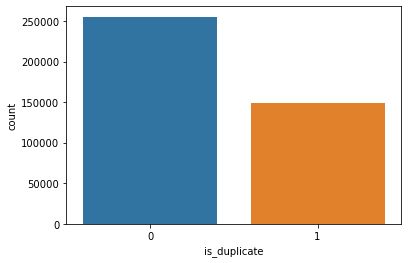

In [8]:
sns.countplot(data['is_duplicate'])
plt.show()

In [9]:
data = data.sample(frac=1, random_state=111).reset_index(drop=True)

In [10]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,69072,137298,137299,What is cruelest thing your ex has said to you...,What is the kindest thing an ex has said to yo...,0
1,254515,500994,500995,What are the benefits of 8GB RAM over 4GB RAM?,"Which laptop is better, one with 1.8ghz and 8G...",0
2,191430,377918,377919,How does the StartupBootCamp accelerator partn...,How do accelerate ourselves in a corporate world?,0
3,300855,590864,590865,Which is the best gadget to be released in 2016?,What are the best gadgets of 2016?,1
4,201376,397382,397383,What is the QuickBooks payroll tech support nu...,What is the QuickBooks technical support phone...,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X = data[['question1', 'question2']]
# y = data['is_duplicate']

X, X_valid, y, y_valid = train_test_split(data[['question1', 'question2']], data['is_duplicate'],
                                                    test_size=0.05, 
                                                    stratify=data['is_duplicate'].values, random_state=32)

In [13]:
X.shape, X_valid.shape, y.shape, y_valid.shape

((384130, 2), (20218, 2), (384130,), (20218,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.053, 
                                                    stratify=y.values, random_state=32)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((363771, 2), (20359, 2), (363771,), (20359,))

In [17]:
del(data)
del(X)
del(y)

In [19]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((363771, 2), (20218, 2), (20359, 2), (363771,), (20218,), (20359,))

In [20]:
X_train.reset_index(inplace = True, drop = True)
X_valid.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)

In [21]:
y_train.reset_index(inplace = True, drop=True)
y_valid.reset_index(inplace = True, drop=True)
y_test.reset_index(inplace = True, drop=True)

In [22]:
y_train

0         0
1         1
2         1
3         0
4         0
         ..
363766    1
363767    1
363768    1
363769    1
363770    0
Name: is_duplicate, Length: 363771, dtype: int64

In [23]:
X_train

,question1,question2
0,What do Croats think of Turks?,What do Turks think of Croats?
1,How will a Trump presidency affect the student...,How will Trump’s presidency affect internation...
2,What are the best startups ideas in India?,What are some of the best startups ideas for I...
3,How can I add Instagram stories from Gallery o...,How do you upload pictures from your PC to you...
4,By what age should I have had my first kiss?,How do I have my first kiss?
...,...,...
363766,What is the best way to ask a girl out on a date?,How should I ask this girl out?
363767,Is time travel possible in next 5 years?,Is it possible to travel back or forward in time?
363768,I am looking for website promotion. How can I ...,How do I find the best SEO company in Delhi?
363769,What are the good books which will help to kno...,What are some good books to learn more about S...


In [24]:
X_train['question1'][1]

'How will a Trump presidency affect the students presently in US or planning to study in US?'

In [25]:
from collections import defaultdict
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bapan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
vocab = defaultdict(lambda: 0)
vocab['<PAD>'] = 1

Q1_train, Q2_train = [], []
for i in range(len(X_train)):
    
    v = nltk.word_tokenize(X_train['question1'][i])
    w = nltk.word_tokenize(X_train['question2'][i])
    q = v + w
    Q1_train.append(v)
    Q2_train.append(w)
  
    for word in q:
        
        if word not in vocab:
            vocab[word] = len(vocab) + 1
print('The length of the vocabulary is: ', len(vocab))

The length of the vocabulary is:  129822


In [27]:
print(Q1_train[1], Q2_train[1])

['How', 'will', 'a', 'Trump', 'presidency', 'affect', 'the', 'students', 'presently', 'in', 'US', 'or', 'planning', 'to', 'study', 'in', 'US', '?'] ['How', 'will', 'Trump', '’', 's', 'presidency', 'affect', 'international', 'students', 'in', 'the', 'US', '?']


In [28]:
print(vocab['<PAD>'])
print(vocab['Astrology'])
print(vocab['Astronomy'])
print(vocab['Bangalore'])

1
9484
20084
899


In [29]:
Q1_valid, Q2_valid = [], []
for i in range(len(X_valid)):
    
    Q1_valid.append(nltk.word_tokenize(X_valid['question1'][i]))
    Q2_valid.append(nltk.word_tokenize(X_valid['question2'][i]))

In [30]:
len(Q1_valid), len(Q2_valid)

(20218, 20218)

In [31]:
print(Q1_valid[0])

['Are', 'there', 'actually', 'any', 'legit', 'work', 'at', 'home', 'jobs', '?']


In [32]:
Q1_test, Q2_test = [], []
for i in range(len(X_test)):
    
    Q1_test.append(nltk.word_tokenize(X_test['question1'][i]))
    Q2_test.append(nltk.word_tokenize(X_test['question2'][i]))

In [33]:
len(Q1_test), len(Q2_test)

(20359, 20359)

In [34]:
# Converting questions to array of integers
for i in range(len(Q1_train)):
    Q1_train[i] = [vocab[word] for word in Q1_train[i]]
    Q2_train[i] = [vocab[word] for word in Q2_train[i]]
    
for i in range(len(Q1_valid)):
    Q1_valid[i] = [vocab[word] for word in Q1_valid[i]]
    Q2_valid[i] = [vocab[word] for word in Q2_valid[i]]

        
for i in range(len(Q1_test)):
    Q1_test[i] = [vocab[word] for word in Q1_test[i]]
    Q2_test[i] = [vocab[word] for word in Q2_test[i]]

In [54]:
# v = Q1_train[0:4], Q2_train[0:4], y_train[0:4].values
# v1 = shuffle(v)
# v1

In [55]:
Q1_train[0:4]

[[2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 18, 19, 8],
 [2, 27, 15, 28, 29, 30, 18, 31, 8],
 [9, 34, 35, 36, 37, 38, 39, 40, 20, 41, 42, 8]]

In [42]:
maxlen = -10000
for arr in Q1_train:
    if len(arr) > maxlen:
        maxlen = len(arr)
print(maxlen)

144


In [48]:
c = 0
maxlen = -10000
for arr in Q2_train:
    if len(arr) > maxlen or len(arr) > 270:
        maxlen = len(arr)
        c = c+1
print(maxlen)
print(c)

272
21


In [49]:
from sklearn.utils import shuffle

In [107]:


def data_generator(Q1, Q2, label, batch_size = 32, pad = vocab['<PAD>']):
    
    num_samples = len(Q1)
    max_len = 272
    
    while True:
        
        for offset in range(0, num_samples, batch_size):
            
            samples_Q1 = Q1[offset : offset + batch_size]
            samples_Q2 = Q2[offset : offset + batch_size]
            samples_label = label[offset : offset + batch_size]
            
            Q1_batch, Q2_batch = [], []
            
            for q1, q2 in zip(samples_Q1, samples_Q2):
                
                q1 = q1 + [pad] * (max_len - len(q1))
                q2 = q2 + [pad] * (max_len - len(q2)) 
                
                Q1_batch.append(q1)
                Q2_batch.append(q2)
            
            Q1_batch = np.array(Q1_batch).astype(np.float32)
            Q2_batch = np.array(Q2_batch).astype(np.float32)
            
            X_batch = Q1_batch, Q2_batch
            y_batch = samples_label.values.astype(np.float32)
            
            yield X_batch, y_batch
            

In [75]:
X[0], X[1]

(array([[ 2,  3,  4, ...,  1,  1,  1],
        [ 9, 10, 11, ...,  1,  1,  1],
        [ 2, 27, 15, ...,  1,  1,  1],
        [ 9, 34, 35, ...,  1,  1,  1]]),
 array([[ 2,  3,  7, ...,  1,  1,  1],
        [ 9, 10, 12, ...,  1,  1,  1],
        [ 2, 27, 32, ...,  1,  1,  1],
        [ 9,  3, 43, ...,  1,  1,  1]]))

In [73]:
y

array([0, 1, 1, 0], dtype=int64)

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda, Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop, Adam

In [80]:
embed_dim = 256
vocab_size = len(vocab)
maxlen = 272
def initialize_base_network():
    input = Input(shape=(maxlen, ))
    x = Embedding(vocab_size, embed_dim,
                  input_length = maxlen)(input)
    
    x = LSTM(128)(x)
    return Model(inputs=input, outputs=x)


In [81]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = tf.math.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, tf.keras.backend.epsilon()))

In [82]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [83]:
base_network = initialize_base_network()
base_network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 272)]             0         
                                                                 
 embedding (Embedding)       (None, 272, 256)          35045120  
                                                                 
 lstm (LSTM)                 (None, 128)               197120    
                                                                 
Total params: 35,242,240
Trainable params: 35,242,240
Non-trainable params: 0
_________________________________________________________________


In [84]:
# create the left input and point to the base network
input_a = Input(shape=(maxlen,), name="left_input")
vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(maxlen,), name="right_input")
vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)

# # plot model graph
# plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [85]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 left_input (InputLayer)        [(None, 272)]        0           []                               
                                                                                                  
 right_input (InputLayer)       [(None, 272)]        0           []                               
                                                                                                  
 model (Functional)             (None, 128)          35242240    ['left_input[0][0]',             
                                                                  'right_input[0][0]']            
                                                                                                  
 output_layer (Lambda)          (None, 1)            0           ['model[0][0]',            

In [96]:
from tensorflow.keras import backend as K

In [97]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [87]:
X_train_, y_train_ = next(data_generator(Q1_train, Q2_train, y_train, batch_size=64, pad=vocab['<PAD>']))
X_valid_, y_valid_ = next(data_generator(Q1_valid, Q2_valid, y_valid, batch_size=64, pad=vocab['<PAD>']))

In [92]:
def train_generator(Q1_train, Q2_train, y_train, batch_size=64, pad=vocab['<PAD>']):
                    
    return data_generator(Q1_train, Q2_train, y_train, batch_size=64, pad=vocab['<PAD>'])

# Create the validation data generator
def val_generator(Q1_valid, Q2_valid, y_valid, batch_size=64, pad=vocab['<PAD>']):
                    
    return data_generator(Q1_valid, Q2_valid, y_valid, batch_size=64, pad=vocab['<PAD>'])

In [88]:
adm = Adam(learning_rate = 0.001)
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=adm)

In [108]:
# batch_size = 64
model.fit_generator(
        train_generator(Q1_train, Q2_train, y_train, batch_size=64, pad=vocab['<PAD>']),
        steps_per_epoch = len(Q1_train) // batch_size,
        epochs=1,
        validation_data = val_generator(Q1_valid, Q2_valid, y_valid, batch_size=64, pad=vocab['<PAD>']),
        validation_steps=len(Q1_valid) // batch_size)

<ipython-input-108-4d3f16872e81>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


TypeError: 'NoneType' object is not callable

In [98]:
# Q1_train = np.array(Q1_train)
# Q1_train

In [99]:
# Q1_test

In [26]:
# N_train = 300000
# N_test  = 10*1024
# data_train = data[:N_train]
# data_test  = data[N_train:N_train+N_test]
# print("Train set:", len(data_train), "Test set:", len(data_test))
# del(data) # remove to free memory

In [31]:
# td_index = (data_train['is_duplicate'] == 1).to_numpy()
# td_index = [i for i, x in enumerate(td_index) if x] 
# print('number of duplicate questions: ', len(td_index))
# print('indexes of first ten duplicate questions:', td_index[:10])

In [32]:
# print(data_train['question1'][5])  #  Example of question duplicates (first one in data)
# print(data_train['question2'][5])
# print('is_duplicate: ', data_train['is_duplicate'][5])

In [33]:
# Q1_train_words = np.array(data_train['question1'][td_index])
# Q2_train_words = np.array(data_train['question2'][td_index])
# y_train = np.array(data_train['is_duplicate'])
# Q1_test_words = np.array(data_test['question1'])
# Q2_test_words = np.array(data_test['question2'])
# y_test  = np.array(data_test['is_duplicate'])

In [34]:
# print('TRAINING QUESTIONS:\n')
# print('Question 1: ', Q1_train_words[0])
# print('Question 2: ', Q2_train_words[0], '\n')
# print('Question 1: ', Q1_train_words[5])
# print('Question 2: ', Q2_train_words[5], '\n')
# print('is_duplicate =', y_train[5], '\n')
# print('TESTING QUESTIONS:\n')
# print('Question 1: ', Q1_test_words[0])
# print('Question 2: ', Q2_test_words[0], '\n')
# print('is_duplicate =', y_test[0], '\n')

In [35]:
# Q1_train_words

In [36]:
# Q2_train_words

In [24]:
# print(Q1_train_words[0])
# print(Q2_train_words[0])

In [63]:
# print(Q1_train[0])
# print(Q2_train[0])

In [69]:
# print('Train set has reduced to: ', len(Q1_train) ) 
# print('Test set length: ', len(Q1_test) )

In [30]:
Q1_test[0]

['How', 'do', 'I', 'prepare', 'for', 'interviews', 'for', 'cse', '?']

In [32]:
print('first question in the train set:\n')
print(Q1_train_words[0], '\n') 
print('encoded version:')
print(Q1_train[0],'\n')

print('first question in the test set:\n')
print(Q1_test_words[0], '\n')
print('encoded version:')
print(Q1_test[0])

first question in the train set:

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me? 

encoded version:
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21] 

first question in the test set:

How do I prepare for interviews for cse? 

encoded version:
[32, 38, 4, 107, 65, 1015, 65, 11509, 21]


In [33]:
print(Q1_test[0:4])
print(Q2_test[0:4])

[[32, 38, 4, 107, 65, 1015, 65, 11509, 21], [30, 156, 78, 216, 8908, 39, 716, 286, 8317, 21], [32, 38, 4, 521, 1340, 735, 0, 65, 47, 1476, 1341, 735, 21], [161, 31, 1597, 302, 21]]
[[30, 156, 78, 216, 375, 39, 107, 65, 11509, 21], [283, 156, 78, 216, 6085, 28, 28, 31082, 39, 716, 28, 288, 8317, 21], [32, 38, 4, 521, 1341, 735, 31317, 65, 47, 1476, 1341, 735, 21], [18505, 3, 161, 31, 1597, 302, 21]]


In [34]:
# Splitting the data
cut_off = int(len(Q1_train)*0.8)
train_Q1, train_Q2 = Q1_train[:cut_off], Q2_train[:cut_off]
val_Q1, val_Q2 = Q1_train[cut_off: ], Q2_train[cut_off:]
print('Number of duplicate questions: ', len(Q1_train))
print("The length of the training set is:  ", len(train_Q1))
print("The length of the validation set is: ", len(val_Q1))

Number of duplicate questions:  111486
The length of the training set is:   89188
The length of the validation set is:  22298


In [35]:

def data_generator(Q1, Q2, batch_size, pad=1, shuffle=True):
    """Generator function that yields batches of data

    Args:
        Q1 (list): List of transformed (to tensor) questions.
        Q2 (list): List of transformed (to tensor) questions.
        batch_size (int): Number of elements per batch.
        pad (int, optional): Pad character from the vocab. Defaults to 1.
        shuffle (bool, optional): If the batches should be randomnized or not. Defaults to True.
    Yields:
        tuple: Of the form (input1, input2) with types (numpy.ndarray, numpy.ndarray)
        NOTE: input1: inputs to your model [q1a, q2a, q3a, ...] i.e. (q1a,q1b) are duplicates
              input2: targets to your model [q1b, q2b,q3b, ...] i.e. (q1a,q2i) i!=a are not duplicates
    """

    input1 = []
    input2 = []
    idx = 0
    len_q = len(Q1)
    question_indexes = [*range(len_q)]
    
    if shuffle:
        rnd.shuffle(question_indexes)
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    while True:
        if idx >= len_q:
            # if idx is greater than or equal to len_q, set idx accordingly 
            # (Hint: look at the instructions above)
            idx = len_q - 1
            # shuffle to get random batches if shuffle is set to True
            if shuffle:
                rnd.shuffle(question_indexes) 
        
        # get questions at the `question_indexes[idx]` position in Q1 and Q2
        q1 = Q1[question_indexes[idx]]
        q2 = Q2[question_indexes[idx]]
        
        # increment idx by 1
        idx += 1
        # append q1
        input1.append(q1)
        # append q2
        input2.append(q2)
        if len(input1) == batch_size:
            # determine max_len as the longest question in input1 & input 2
            # Hint: use the `max` function. 
            # take max of input1 & input2 and then max out of the two of them.
            max_len =  max(max([len(q) for q in input1]),max([len(q) for q in input2]))
            # pad to power-of-2 (Hint: look at the instructions above)
            max_len = 2**int(np.ceil(np.log2(max_len)))
            b1 = [] 
            b2 = [] 
            for q1, q2 in zip(input1, input2):
                # add [pad] to q1 until it reaches max_len
                q1 = q1 + [pad] * (max_len - len(q1))
                # add [pad] to q2 until it reaches max_len
                q2 = q2 + [pad] * (max_len - len(q2))               
                # append q1
                b1.append(q1)
                # append q2
                b2.append(q2)
            # use b1 and b2
            yield np.array(b1), np.array(b2)

            input1, input2 = [], [] 


In [39]:
batch_size = 4
res1, res2 = next(data_generator(train_Q1, train_Q2, batch_size))
print("Batch1 : ",'\n', res1, '\n')
print("Batch2 : ",'\n', res2)

Batch1 :  
 [[  219  6801   922  6799    21     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1]
 [   32    16   111   521  4658    21     1     1     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1]
 [  244   156   134   135    39    34  2584   131    78  2282  2283    72
   1675  8671    25   614    21     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1]
 [  219     6   704  1317   363  1315    65     6  4579    81   386  9551
     28   547 14563    21     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1]] 

Batch2 :  
 [[  219  6801   922 17843    21    86    81   176   363    21     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1    

In [47]:
from tensorflow.python.keras.utils.vis_utils import plot_model

In [65]:
# base_network = initialize_base_network()
# plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')